### Шаг 1. Изучение общей информации. 

In [1]:
import pandas as pd

In [2]:
flats = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
print('Всего студий:', flats['studio'][flats['studio']==True].count())
print('Незаполненных значений "kitchen_area":', 23699 - 21421)

Всего студий: 149
Незаполненных значений "kitchen_area": 2278


### Вывод

В таблице информация о 23 699 объектах в СПб и Ленинградской области.  

Пропущены значения в столбцах:  
ceiling_height - высота потолков - пропусков слишком много, их нечем змполнить, слишком мало информации.  
floors_total - всего этажей в доме - пропущенных значений немного (86 из 23699), возможно, пропуски случайны (забыли указать).  
living_area - жилая площадь в квадратных метрах - все помнят свою общую площадь, но не все помнят жилую (или не знают, как она считается)  
is_apartment - апартаменты - если это аппартаменты, обязательно будет указано  
kitchen_area - площадь кухни в квадратных метрах - у студий нет кухни, но студий всего 149, а пропущенных значений 2278, слишком много для случайности. Кто-то не знает площадь своей кухни или специально не указал.
balcony - число балконов - нет балкона - нет значения  
locality_name - пропущенных значений немного (49 - 0.2%), скорее всего это случайные пропуски.   
airports_nearest - расстояние до ближайшего аэропорта в метрах  
cityCenters_nearest - расстояние до центра города - много пропусков - возможно, для некоторых населенных пунктов нет значений в базе данных  
parks_around3000 - число парков в радиусе 3 км - много пропусков - возможно, для некоторых населенных пунктов нет значений в базе данных  
parks_nearest - расстояние до ближайшего парка - то же  
ponds_around3000 - число водоёмов в радиусе 3 км - то же  
ponds_nearest - расстояние до ближайшего водоёма - то же  
days_exposition - сколько дней было размещено объявление - возможно, на момент внесения последних изменений квартира еще не была продана, поэтому данных о сроке продажи нет  
  
Необходимо изменить тип данных в столбцах:  
first_day_exposition - заменить на datetime  
floors_total - заменить на int (кол-во этажей - целое число)  
is_apartment - заменить на bool (или аппартаменты или нет)  
balcony - заменить на int (кол-во балконов - целое число)  
parks_around3000 - заменить на int (кол-во парков - целое число)  
ponds_around3000 - заменить на int (кол-во водоёмов - целое число)  
days_exposition - заменить на int (кол-во дней - целое число)

### Шаг 2. Предобработка данных

In [5]:
flats['floors_total'] = flats['floors_total'].fillna(flats['floor'])
flats['is_apartment'] = flats['is_apartment'].fillna(False)
flats['balcony'] = flats['balcony'].fillna(0)

Пропущенные значения высоты потолков оставляем, их нечем заполнить.  
Для пропущенных значений этажности дома указываем этаж из таблицы. Этажность дома как минимум не меньше текущего этажа.  
Для пропущенных значений 'is_apartment' ставим False. Не указано - значит не аппартаменты.  
Для неизвестного кол-ва балконов - значение 0, нет балкона.  
Пропущенные значения населенных пунктов оставим без изменения - их мало и они не повлияют на общую картину, к тому же эдесь велика вероятность ошибки (у разных населенных пунктов могут быть похожие расстояния до центра, а у одних и тех же - разные (например, Санкт-Петербург от 0.2  до  29.5 км.  
Пропущенные значения 'days_exposition' заполнить нечем.

In [6]:
for name in flats['locality_name'].unique():
    distance_mean = flats[flats['locality_name'] == name]['cityCenters_nearest'].mean()
    flats.loc[flats['locality_name'] == name, 'cityCenters_nearest'] = (
    flats.loc[flats['locality_name'] == name, 'cityCenters_nearest']
    .fillna(distance_mean)
)
flats['cityCenters_nearest'] = flats['cityCenters_nearest'].fillna(100000)

Пропущенные значения расстояния до центра заполняем средним расстоянием по каждому населенному пункту в цикле.  
По многим пунктам нет информации о расстоянии, указываем 100 км, это будет означать 100 км и больше, карта это в основном подтверждает.  

In [7]:
koeff_living = flats['total_area'].mean() / flats['living_area'].mean()
koeff_kitchen = flats['total_area'].mean() / flats['kitchen_area'].mean()
flats['living_area'] = flats['living_area'].fillna(flats['total_area']/koeff_living)
flats['kitchen_area'] = flats['kitchen_area'].fillna(flats['total_area']/koeff_kitchen)


Посчитаем отношение средней общей площади к средней жилой. С помощью этого коэффициента заполним пропущенные значения жилой площади.  
Ту же операцию выполним для заполнения пропущенных значений площади кухни.

In [8]:
flats['first_day_exposition'] = pd.to_datetime(flats['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
flats['floors_total'] = flats['floors_total'].astype('Int64')
flats['balcony'] = flats['balcony'].astype('int')
flats['parks_around3000'] = flats['parks_around3000'].astype('Int64')
flats['ponds_around3000'] = flats['ponds_around3000'].astype('Int64')
flats.loc[flats['days_exposition'].notnull(), 'days_exposition'] = flats.loc[flats['days_exposition'].notnull(), 'days_exposition'].apply(int)
flats['days_exposition'] = flats['days_exposition'].astype('Int64')
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null Int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null float64
ponds_around30

In [9]:
flats.duplicated().sum()

0

Приведем столбец 'first_day_exposition' к формату datetime64.  
Приведем столбцы 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition' к формату 'int'.  
Остались пропущенные значения только в тех столбцах, которые не будут участвовать в нашем исследовании.  
Дубликатов нет.

### Шаг 3. Посчитать и добавить в таблицу

Добавим столбцы:  
meter_price - цена квадратного метра  
weekday, month, year - день недели, иесяц и год публикации. Т.к дни недели наяинается с нуля, прибавим единицу, чтобы было привычнее.  
flooor_type - тип этажа (первый, последний иди другой)  
livihg/total - отношение жилой площади к общей (вообще-то мы часть значений жилой площади считали через этот самый коэффициент, но таких значений относительно немного, а коэффициент для этих строк будет средним среди остальных)  
kitchen/total - отношение площади кухни к общей площади

In [10]:
flats['meter_price'] = flats['last_price'] / flats['total_area'] 
flats['weekday'] = flats['first_day_exposition'].dt.weekday + 1
flats['month'] = flats['first_day_exposition'].dt.month
flats['year'] = flats['first_day_exposition'].dt.year

for i in range(len(flats)):
    if flats.loc[i,'floor'] == 1:
        flats.loc[i,'flooor_type'] = ['первый']
    elif flats.loc[i,'floor'] == flats.loc[i,'floors_total']:
        flats.loc[i,'flooor_type'] = ['последний']
    else:
        flats.loc[i,'flooor_type'] = ['другой']

flats['living/total'] = flats['living_area'] / flats['total_area']
flats['kitchen/total'] = flats['kitchen_area'] / flats['total_area']
flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday,month,year,flooor_type,living/total,kitchen/total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,NaN,120370.370370,4,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0,NaN,81,82920.792079,2,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,2,574.0,558,92785.714286,4,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,90.785766,9,False,...,3,234.0,424,408176.100629,5,7,2015,другой,0.570980,0.175146
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121,100000.000000,2,6,2018,другой,0.320000,0.410000


### Шаг 4. Исследовательский анализ данных.

In [11]:
import matplotlib.pyplot as plt

Напишем функцию для построения гистограммы. На вход она принимает датафрейм, имя столбца и количество корзин. Функция высчитывает значения квартилей и межквартильного интервала, затем присваивает граничные значения гистограммы Q1-1.5*IQR и Q3+1.5*IQR, отсеивая таким образом выбросы и, наконец, строит саму гистограмму по заданным условиям. Границы отсеивания ( в данном случае 1.5*IQR) можно менять вручную.

In [12]:
def histogramma(data, column_name, bins_quantity):
    data_column = data[[column_name]]
    Q1 = data_column.describe()[column_name]['25%']
    Q3 = data_column.describe()[column_name]['75%']
    IQR = Q3 - Q1
    min = Q1-1.5*IQR
    max =  Q3 + 1.5*IQR
    data[column_name].hist(bins=bins_quantity, range=(min, max));

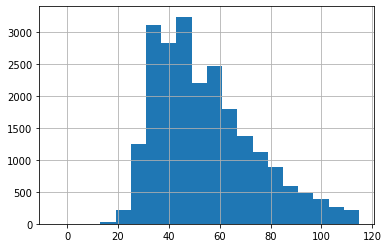

In [13]:
histogramma (flats, 'total_area', 20)

Квартир площадью менее 25 м2 очень мало, с площадью от 25 до 30 кв.м встрещаются уже чаще. Наибольшее количество квартир имеет площадь 35-50 кв.метров. Затем с увеличением площади количество квартир уменьшается, квартиры площадью больше 120 м2 встечаются редко

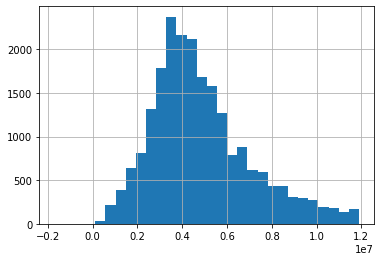

In [14]:
histogramma(flats, 'last_price', 30)

Средняя цена квартиры - около 3,5 млн. рублей и распределена почти равномерно в обе стороны (чуть больше вправо). Квартиры дороже 12 млн. встречаются нечасто.

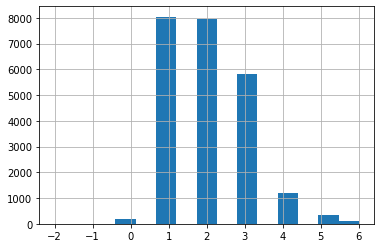

In [15]:
histogramma(flats, 'rooms', 15)

Наибольшее предложение - однушки и двушки (примерго поровну), трешки немного отстают. Четырехкомнатные тоже есть, но их немного, пятикомнатных совсеи мало, остальное - редкость. Отдельно стоят квартиры с нулем комнат, непонятно, что это. Возможно, кто-то так отметил студии.

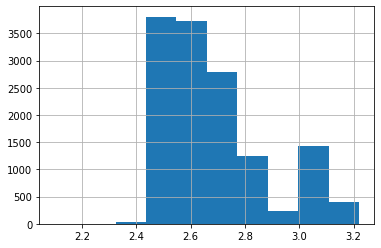

In [16]:
histogramma(flats, 'ceiling_height', 10)

2,5 - 2,7 метров - наиболее типичная высота потолков. Далее с увеличением высоты кол-во квартир уменьшается, слегка увеличившись на высоте 3 м. Видимо, была некая типовая застройка с такой высотой потолков.

count    18764.000000
mean       127.045726
std        119.120186
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        499.000000
Name: days_exposition, dtype: float64


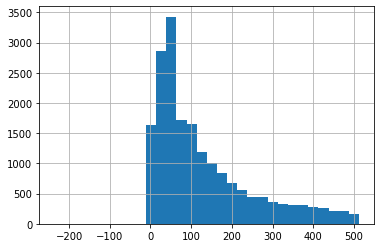

In [17]:
histogramma(flats, 'days_exposition', 30)
print(flats.query('days_exposition < 500')['days_exposition'].describe())

Среднее время продажи - 4 мес., медианное - 3 мес. Если продали квартуру быстрее, чем за квартал, значит ваше предложение было интересным. Не продается более 4 мес. - повод задуматься и, возможно, снизить цену.  
Удалим выбросы.

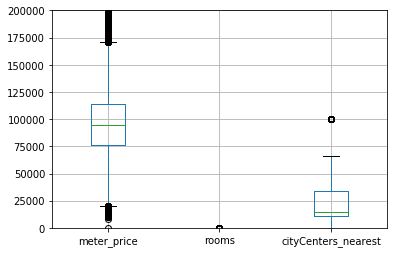

In [18]:
flats2 = flats[['meter_price','rooms', 'cityCenters_nearest']]
plt.ylim(0, 200000)
flats2.boxplot()
flats2 = flats2.query('25000<meter_price<170000 and cityCenters_nearest<70000')


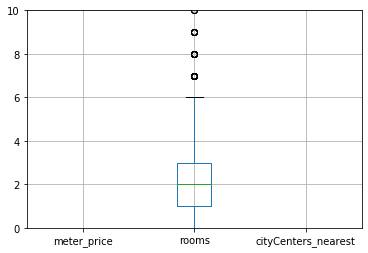

In [19]:
plt.ylim(0,10)
flats2.boxplot()
flats2 = flats2.query('rooms<=6')

                     meter_price     rooms  cityCenters_nearest
meter_price             1.000000 -0.177802            -0.399632
rooms                  -0.177802  1.000000            -0.158782
cityCenters_nearest    -0.399632 -0.158782             1.000000


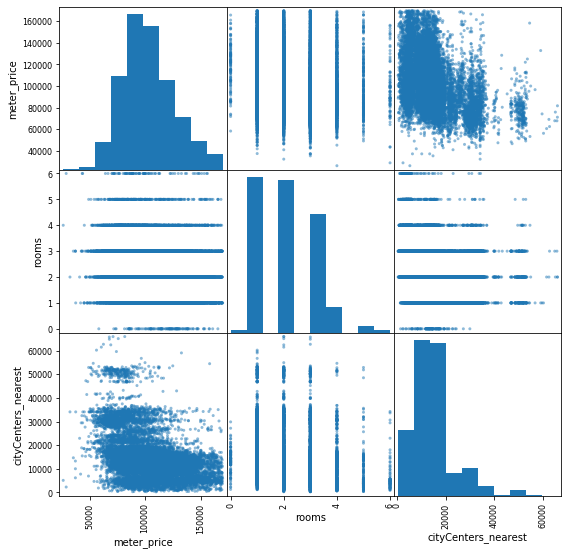

In [20]:
print(flats2.corr())
pd.plotting.scatter_matrix(flats2, figsize=(9, 9));

В таблице коэффициентов корреляции и на графиках мы видим, что цена квадратного метра  практически не зависит от количества комнат, а вот от расстояния до центра зависимость есть - чем дальше, тем дешевле.

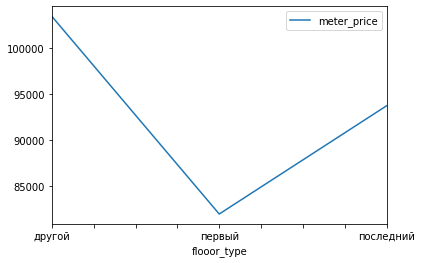

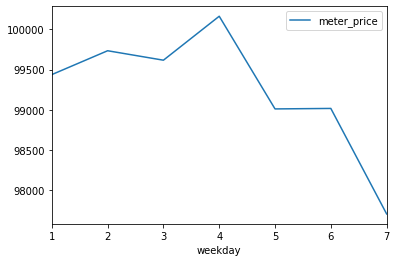

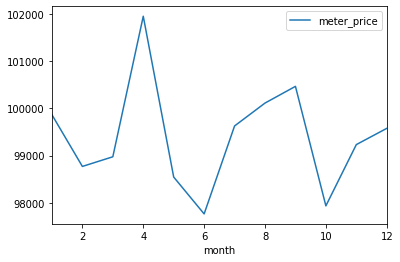

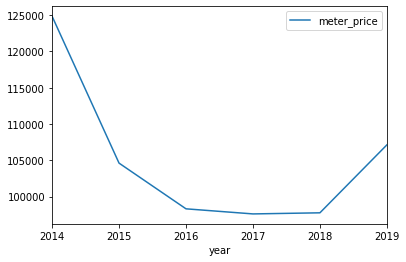

In [21]:
parameters = ['flooor_type', 'weekday', 'month', 'year']
for parameter in parameters:
    flats.pivot_table(index=parameter, values='meter_price', aggfunc='mean').plot();

Квартиры на первом этаже самые дешевые, затем идет последний этаж, самые дорогие - между ними. Впрочем, это очевидный вывод.  
По воскресеньям квартиры предлагают чуть дешевле. Удивительно, но это так.  Возможно, к концу недели(на выходных) люди пересматривают свои "хотелки" и снижают цену.  
Пик цены за кв. метр - апрель, в июне и в октябре цена самая низкая.  
Начиная с 2014 и по 2018 год цена за метр падала (особенно сильное падение было в 2014-м). Начиная с 2018 года цена пошла вверх, но до прежних значений еще далеко.

In [22]:
flats_mean_price = flats.pivot_table(index='locality_name', values='meter_price', aggfunc=['mean', 'count'])
flats_mean_price.columns = ['mean_price', 'count']
print(flats_mean_price.sort_values(by='count', ascending=False ).head(10))
print()
print(flats_mean_price.sort_values(by='mean_price', ascending=False ))

                      mean_price  count
locality_name                          
Санкт-Петербург    114849.008794  15721
посёлок Мурино      85752.189195    522
посёлок Шушары      78677.364217    440
Всеволожск          68654.473986    398
Пушкин             103125.819291    369
Колпино             75424.579098    338
посёлок Парголово   90175.913458    327
Гатчина             68746.146763    307
деревня Кудрово     92473.547576    299
Выборг              58141.909153    237

                          mean_price  count
locality_name                              
посёлок Лисий Нос      121616.221359      2
Зеленогорск            115122.799198     24
Санкт-Петербург        114849.008794  15721
посёлок Репино         104238.614786      4
Пушкин                 103125.819291    369
...                              ...    ...
поселок Совхозный       12629.129129      2
деревня Выскатка        12335.480902      2
деревня Вахнова Кара    11688.311688      1
посёлок станции Свирь   11481.48148

Самая высокая стоимость квадратного метра а Лисьем Носу. Оно и понятно - курортный район, берег Финского залива, к тому же там всего 2 предложения. Самая низкая стоимость в деревне Старополье (даже не знаю, где это, где-то в ж... мира)

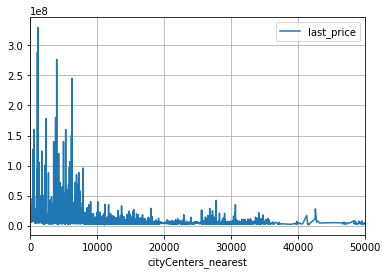

In [23]:
flats.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot(grid=True, xlim=(0,50000));

На графике четко видно, что квартиры в области дешевле. Там есть свои локальные максимумы, но в целом картина ясна: городские квартиры дороже.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


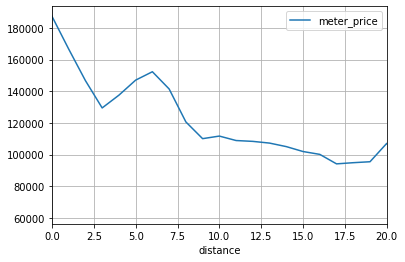

In [24]:
flats_SPB = flats.query('locality_name == "Санкт-Петербург"')
flats_SPB['distance'] = (flats_SPB['cityCenters_nearest'] / 1000).astype(int)
flats_SPB.pivot_table(index='distance', values='meter_price', aggfunc='mean').plot(grid=True, xlim=(0,20));
flats_center = flats_SPB.query('distance <= 6')

Определим границу центра города радиусом в 6 км. После этого расстояния цена квадратного метра падает. Внутри центра тоже есть локальное падение цены. Возможно, это районы с аварийным или ветхим жильем, такое в центре встречается.

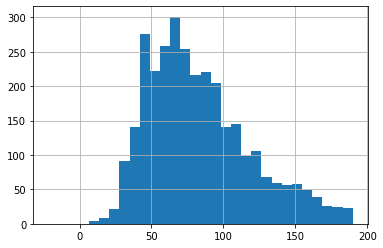

In [25]:
histogramma(flats_center, 'total_area', 30)

По сравнению с всей выборкой площадь квартир в центре в среднем больше. Наиболшее количество квартир имеют площадь около 75 м2, однако велика и доля квартир с большей площадью

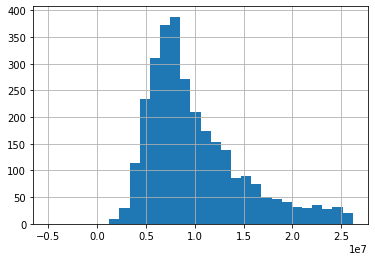

In [26]:
histogramma(flats_center, 'last_price', 30)

Соимость квартир в центре выше. Пик предложений приходится на 8 млн, график заметно смещен вправо.

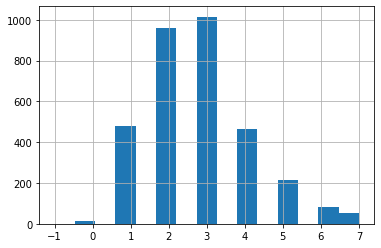

In [27]:
histogramma(flats_center, 'rooms', 15)

Здесь наибольшее кол-во предложений приходится на трешки (в отличие от общей картины, где больше всего одно- и двухкомнатных квартир). Квартир в 4-5 комнат также заметно больше, чем в целом по городу.

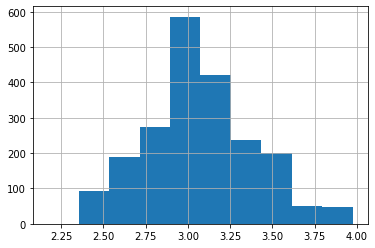

In [28]:
histogramma(flats_center, 'ceiling_height', 10)

В среднем потолки в центре выше, основное количество предложений приходится на трехметровые потолки. Вероятно, этим и объясняется аномалия в общей картине.

count    2315.000000
mean      150.522246
std       128.705025
min         3.000000
25%        50.000000
50%       106.000000
75%       226.000000
max       499.000000
Name: days_exposition, dtype: float64


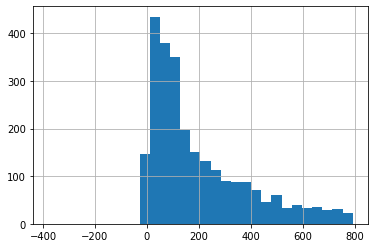

In [29]:
print(flats_center.query('days_exposition < 500')['days_exposition'].describe())
histogramma(flats_center, 'days_exposition', 30)

В центре квартиры продаются медленнее, в среднем за 5 мес. Но при этом есть большое количество быстрых продаж.

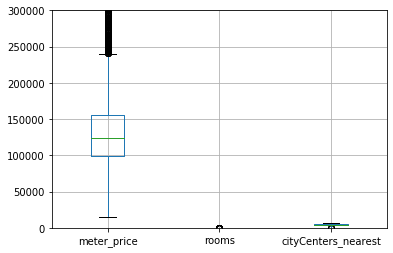

In [30]:
flats_center2 = flats_center[['meter_price','rooms', 'cityCenters_nearest']]
plt.ylim(0, 300000)
flats_center2.boxplot()
flats_center2 = flats_center2.query('meter_price<240000')

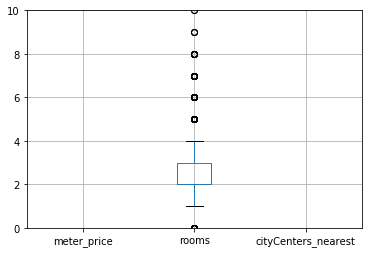

In [31]:
plt.ylim(0, 10)
flats_center2.boxplot()
flats_center2 = flats_center2.query('rooms<7')

                     meter_price     rooms  cityCenters_nearest
meter_price             1.000000 -0.253778             0.072730
rooms                  -0.253778  1.000000            -0.182923
cityCenters_nearest     0.072730 -0.182923             1.000000


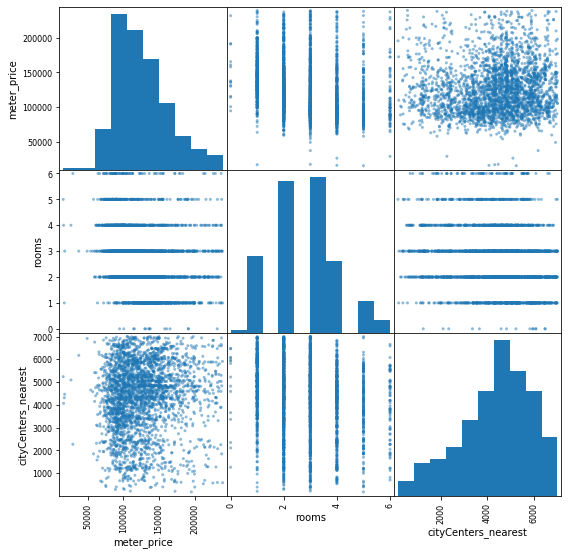

In [32]:
print(flats_center2.corr())
pd.plotting.scatter_matrix(flats_center2, figsize=(9, 9));

Также отсеем выбросы и посмотрим корреляцию. Расстояние до центра уже ограничено.  
Цена квадратного метра в центре не зависит от количества комнат и удаленности от условного центра города. Центр - он и есть центр.

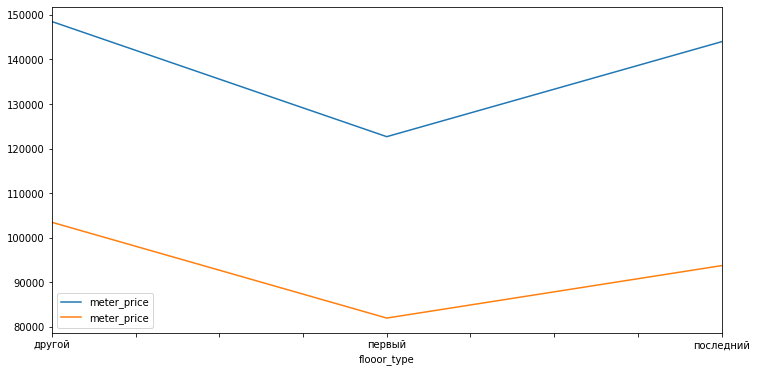

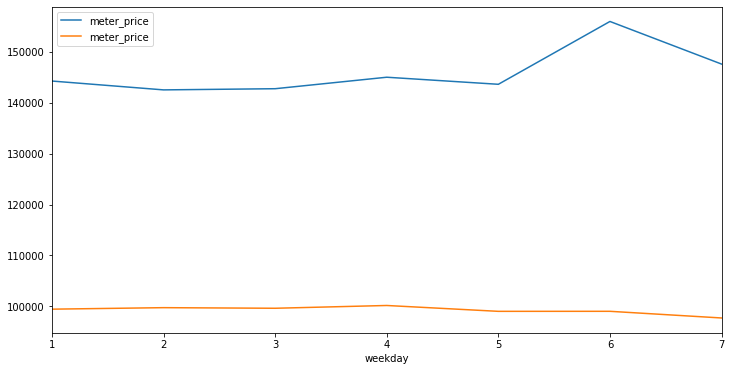

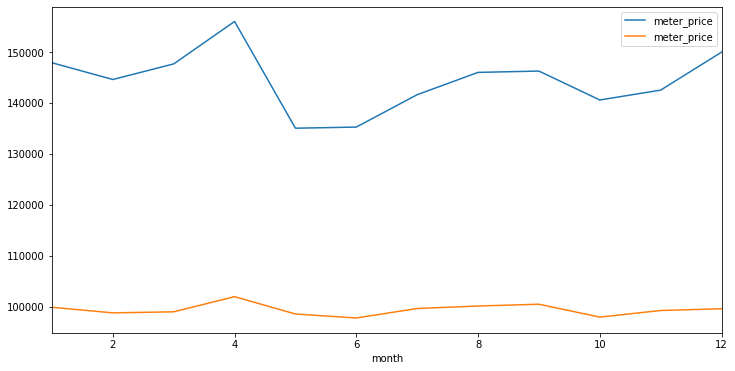

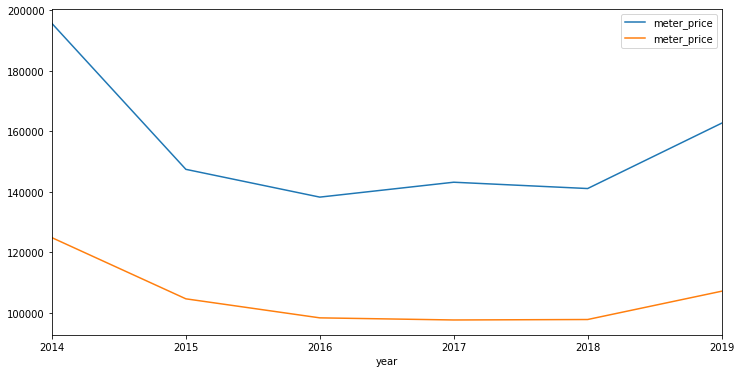

In [33]:
for parameter in parameters:
    ax = flats_center.pivot_table(index=parameter, values='meter_price', aggfunc='mean').plot()
    flats.pivot_table(index=parameter, values='meter_price', aggfunc='mean').plot(ax=ax, figsize=(12,6))

Синяя линия - центр, оранжевая - все квартиры.  
  
С этажами всё понятно: первый самй дешевый, потом последний, потом остальные. Как и везде. Правда, разница между последним этажом и остальными поменьше.  
Пик цены приходится на выходные в отличие от общей выборки. Не поддается объяснению.   
С разбивкой по месяцам картина знакомая: максимум в апреле, минимум в начале лета.  
По годам прослеживается общая тенденция: спад с 2014 по 2018 год, после подъем, пока не дошедший до максимума. Впрочем, с нынешним кризисом это скоро исправится.

### Шаг 5. Общий вывод

Итак.  
  
   В исследовании участвовали объявления о продаже квартир Спнкт-Петербурга и Ленинградской области.  
В ходе работы были по возможности заполнены недостающие значения, данные приведени к необходимому типу. Изучены такие параметры, как площадь квартиры, её цена, количество комнат, высота потолков, время продажи. Построены гистограммы для каждого параметра. Определены факторы, влияющие на стоимость квартиры. Те же параметры изучены и определены отдельно для сегмента квартир в центре города, произведено сравнение с общей картиной.  
  
   Наибольшее количество предложений в самом СПб и близлежащих пригородах(Мурино, Шушарф, Пушкин, Всеволожск и т.д.). В топ-10 также вошел город Выборг. Анализ показал, что наиболее часто в объявлениях встречаются одно- и двухкомнатные квартиры площадью 40-50 кв.м. с высотой потолков ~ 2.7 м. Квартиры, расположенные на 1-м этаже дешевле всего, затем идет последний этаж и, наконец, самые дорогие посередине. Также на цену влияет удаленность от города - чем дальше, тем в среднем дешевле. Но есть и исключения. Например, самая высокая средняя цена квадратного метра как раз в пригороде - в Лисьем Носу и в Зеленогорске.  
    Цена подвержена сезонным колебаниям: максимум приходится на апрель, минимум - на июнь. Также четко прослеживается падение цен в 2014 - 2018 годах.  
Половина квартир продается за 3 месяца, среднее время продажи - полгода (на него оказывают влияние "долгие" продажи).  
   У квартир в центре СПб, то здесь есть некоторые особенности. Квартиры в центре имеют бОльшую площадь, высоту потолков, а также количество комнат. У них выше стоимость квадратного метра и нет четкой зависимости от расстояния до географического центра.  
    Что касается сезонности и спада 2014-2018, то ситуация в центре повторяет общую картину. Квартиры в центре продаются дольше, чем в среднем по городу и области, что, видимо, объясняется их более высокой ценой.